# Customer Segmentation using K-Means Algorithm for Seasonal Profiles

The individual files should contain 3 months data of energy consumption in 15 minute interval

In [1]:
import polars as pl
import glob
from pathlib import Path
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import logging
import re
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


from tslearn.clustering import TimeSeriesKMeans 

logging.getLogger('matplotlib.font_manager').disabled = True
dataset = "SWW"    # Options: "SWW", "GroupE"

## Select the season for clustering

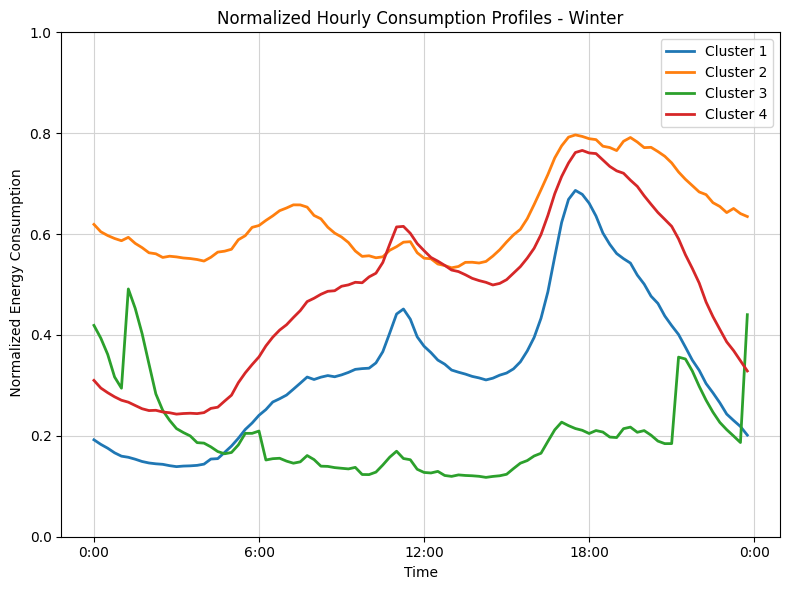

In [3]:
season_1 = 'winter'  # 'winter', 'spring', 'summer', 'autumn'
n_timestamps = 96


pattern = (f"/Users/jansigrist/Documents/SP/Customer_Segmentation_Lantern/DATA/{dataset}/SM_DATA_seasonal_normalized/SM_DATA_seasonal_normalized_{season_1}/*CH*.csv")
file_paths = glob.glob(pattern)

clusters_train_season1 = pl.read_csv(f'/Users/jansigrist/Documents/SP/Customer_Segmentation_Lantern/Results/{dataset}/DATA/Cluster/hourly_avg_clustering_{season_1}.csv')["cluster"]
filename_list = pl.read_csv(f'/Users/jansigrist/Documents/SP/Customer_Segmentation_Lantern/Results/{dataset}/DATA/Cluster/hourly_avg_clustering_{season_1}.csv')["house_id"]

n_clusters = len(np.unique(clusters_train_season1))

house_ids = [str(h) for h in filename_list]  # desired order [web:0]

# Build a mapping from CH... id -> file_path
pattern = re.compile(r"(CH[^_\.]*)")  # same pattern as before [web:0]
id_to_path = {}

for fp in file_paths:
    base = os.path.basename(fp)
    m = pattern.search(base)
    if m:
        ch_id = m.group(1)
        # Only keep mapping for IDs we actually want
        if ch_id in filename_list:
            id_to_path[ch_id] = fp  # assumes unique mapping [web:0]

data_list = []

for ch_id in filename_list:
    if ch_id not in id_to_path:
        raise ValueError(f"No file found for id {ch_id}")  # consistency check [web:0]
    file_path = id_to_path[ch_id]

    df = pl.read_csv(file_path)
    if len(df) != n_timestamps:
        raise ValueError(f"File {file_path} for id {ch_id} has {len(df)} rows, expected {n_timestamps}")  # strict [web:0]

    values_array = df["day_avg_bruttolastgang_kwh"].to_numpy().reshape((1, n_timestamps, 1))
    data_list.append(values_array)

train_data_season1 = np.concatenate(data_list, axis=0)

labels = ['0:00','6:00','12:00','18:00','0:00']

colors= ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd']

plt.figure(figsize=(8,6))
for cluster_idx in range(n_clusters):
    # Get all time series in this cluster
    cluster_idx = cluster_idx + 1
    cluster_data = train_data_season1[clusters_train_season1 == cluster_idx]
    cluster_indices = np.where(clusters_train_season1 == cluster_idx)[0]    
    
    # Calculate the mean time series for the cluster
    mean_time_series = np.mean(cluster_data, axis=0)
    
    # Plot the mean time series
    cluster_no = cluster_idx
    plt.plot(range(1,97), mean_time_series.ravel(), 
            label= f'Cluster {cluster_no}',
            linewidth =2, color=colors[cluster_idx-1] )
    plt.title(f'Normalized Hourly Consumption Profiles - {season_1.capitalize()}')
    plt.xlabel("Time")
    plt.ylabel(" Normalized Energy Consumption")
    plt.ylim(0,1)
    plt.xticks(range(1,120,24),labels=labels)
    plt.tight_layout()
    plt.grid(True, color = 'lightgray')
    plt.legend(
    loc='upper right',
    bbox_to_anchor=(1, 1),
    ncol=1,
    fontsize='medium'
)
plt.savefig(
f"/Users/jansigrist/Documents/SP/Customer_Segmentation_Lantern/Results/{dataset}/Plots/Cluster/" \
"seasonal_clusters_" + season_1 + ".png",
bbox_inches='tight'
)
plt.show()

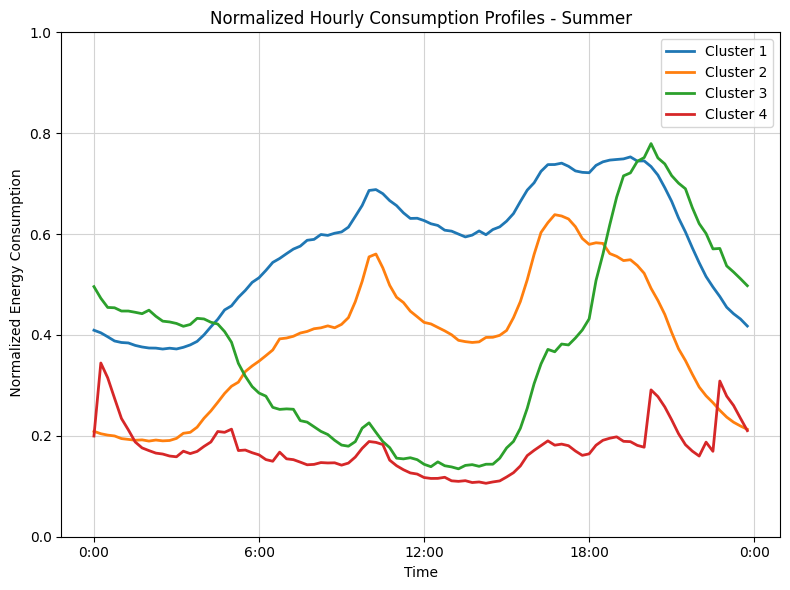

In [5]:
season_2 = 'summer'  # 'winter', 'spring', 'summer', 'autumn'
n_timestamps = 96


pattern = (f"/Users/jansigrist/Documents/SP/Customer_Segmentation_Lantern/DATA/{dataset}/SM_DATA_seasonal_normalized/SM_DATA_seasonal_normalized_{season_2}/*CH*.csv")
file_paths = glob.glob(pattern)

clusters_train_season2 = pl.read_csv(f'/Users/jansigrist/Documents/SP/Customer_Segmentation_Lantern/Results/{dataset}/DATA/Cluster/hourly_avg_clustering_{season_2}.csv')["cluster"]
filename_list = pl.read_csv(f'/Users/jansigrist/Documents/SP/Customer_Segmentation_Lantern/Results/{dataset}/DATA/Cluster/hourly_avg_clustering_{season_2}.csv')["house_id"]

n_clusters = len(np.unique(clusters_train_season2))

house_ids = [str(h) for h in filename_list]  # desired order [web:0]

# Build a mapping from CH... id -> file_path
pattern = re.compile(r"(CH[^_\.]*)")  # same pattern as before [web:0]
id_to_path = {}

for fp in file_paths:
    base = os.path.basename(fp)
    m = pattern.search(base)
    if m:
        ch_id = m.group(1)
        # Only keep mapping for IDs we actually want
        if ch_id in filename_list:
            id_to_path[ch_id] = fp  # assumes unique mapping [web:0]

data_list = []

for ch_id in filename_list:
    if ch_id not in id_to_path:
        raise ValueError(f"No file found for id {ch_id}")  # consistency check [web:0]
    file_path = id_to_path[ch_id]

    df = pl.read_csv(file_path)
    if len(df) != n_timestamps:
        raise ValueError(f"File {file_path} for id {ch_id} has {len(df)} rows, expected {n_timestamps}")  # strict [web:0]

    values_array = df["day_avg_bruttolastgang_kwh"].to_numpy().reshape((1, n_timestamps, 1))
    data_list.append(values_array)

train_data_season2 = np.concatenate(data_list, axis=0)

labels = ['0:00','6:00','12:00','18:00','0:00']

colors= ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd']

plt.figure(figsize=(8,6))
for cluster_idx in range(n_clusters):
    # Get all time series in this cluster
    cluster_idx = cluster_idx + 1
    cluster_data = train_data_season2[clusters_train_season2 == cluster_idx]
    cluster_indices = np.where(clusters_train_season2 == cluster_idx)[0]    
    
    # Calculate the mean time series for the cluster
    mean_time_series = np.mean(cluster_data, axis=0)
    
    # Plot the mean time series
    cluster_no = cluster_idx
    plt.plot(range(1,97), mean_time_series.ravel(), 
            label= f'Cluster {cluster_no}',
            linewidth =2, color=colors[cluster_idx-1] )
    plt.title(f'Normalized Hourly Consumption Profiles - {season_2.capitalize()}')
    plt.xlabel("Time")
    plt.ylabel(" Normalized Energy Consumption")
    plt.ylim(0,1)
    plt.xticks(range(1,120,24),labels=labels)
    plt.tight_layout()
    plt.grid(True, color = 'lightgray')
    plt.legend(
    loc='upper right',
    bbox_to_anchor=(1, 1),
    ncol=1,
    fontsize='medium'
)
plt.savefig(
f"/Users/jansigrist/Documents/SP/Customer_Segmentation_Lantern/Results/{dataset}/Plots/Cluster/" \
"seasonal_clusters_" + season_2 + ".png",
bbox_inches='tight'
)
plt.show()

In [6]:
remap = {3: 2, 4: 3, 1: 4, 2: 1}
clusters_train_season2 = np.vectorize(remap.get)(clusters_train_season2)

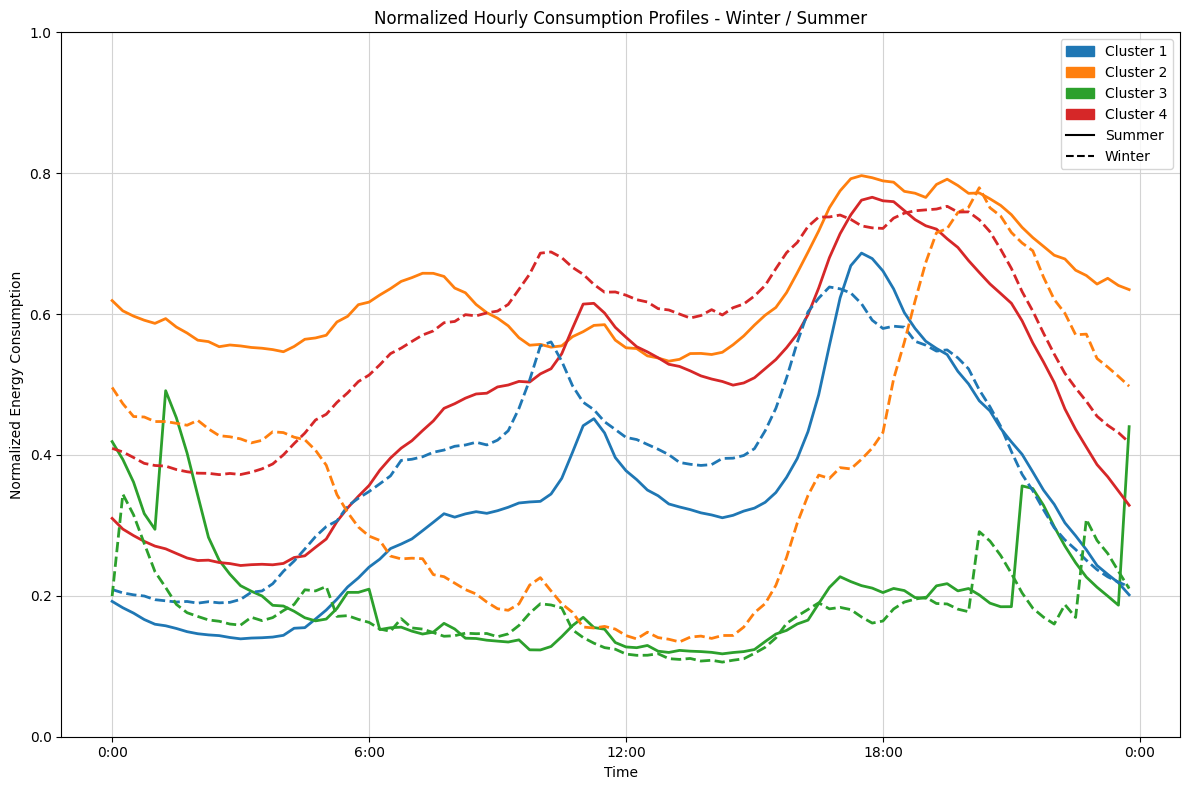

In [7]:

labels = ['0:00','6:00','12:00','18:00','0:00']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
color_patches = [mpatches.Patch(color=colors[i], label=f'Cluster {i+1}') for i in range(n_clusters)]

def plot_clusters_season():
    plt.figure(figsize=(12,8))

    # First: plot solid lines (set 1)
    for cluster_idx in range(n_clusters):
        cluster_idx = cluster_idx +1
        cluster_data_summer = train_data_season1[clusters_train_season1 == cluster_idx]
        mean_time_series = np.mean(cluster_data_summer, axis=0)
        plt.plot(range(1,97), mean_time_series.ravel(), 
                label= f'Cluster {cluster_idx+1} (Set 1)',
                linewidth=2, color=colors[cluster_idx-1], linestyle='solid')

    # Second: plot dashed lines (set 2)
    for cluster_idx in range(n_clusters):
        cluster_idx = cluster_idx +1
        cluster_data_winter = train_data_season2[clusters_train_season2 == cluster_idx]
        mean_time_series_2 = np.mean(cluster_data_winter, axis=0)
        plt.plot(range(1,97), mean_time_series_2.ravel(), 
                label= f'Cluster {cluster_idx+1} (Set 2)',
                linewidth=2, color=colors[cluster_idx-1], linestyle='dashed')

    plt.title(f'Normalized Hourly Consumption Profiles - {season_1.capitalize()} / {season_2.capitalize()}')
    plt.xlabel("Time")
    plt.ylabel("Normalized Energy Consumption")
    plt.ylim(0,1)
    plt.xticks(range(1,120,24),labels=labels)
    plt.tight_layout()
    plt.grid(True, color = 'lightgray')
    
    solid_line = mlines.Line2D([], [], color='black', linestyle='solid', label='Summer')
    dashed_line = mlines.Line2D([], [], color='black', linestyle='dashed', label='Winter')


    plt.legend(handles=color_patches + [solid_line, dashed_line], loc='upper right', fontsize='medium')

    plt.savefig(
        f"/Users/jansigrist/Documents/SP/Customer_Segmentation_Lantern/Results/{dataset}/Plots/Cluster/seasonal_clusters_{season_1}_{season_2}.png",
        bbox_inches='tight'
    )
    plt.show()

plot_clusters_season()